# 原始图像处理

In [1]:
import cv2
import os

# 视频文件路径
video_path = 'data\\振动视频1.avi'

# 确保输出目录存在
output_dir = 'data\\original'
os.makedirs(output_dir, exist_ok=True)

# 打开视频文件
cap = cv2.VideoCapture(video_path)

# 初始化帧计数器
frame_count = 0

# 循环直到视频结束
while True:
    # 读取一帧
    ret, frame = cap.read()
    
    # 检查是否成功读取了一帧
    if not ret:
        break
    
    # 构建输出图片的路径
    frame_path = os.path.join(output_dir, f'frame_{frame_count:04d}.bmp')
    
    # 保存帧为BMP格式
    cv2.imwrite(frame_path, frame)
    
    # 更新帧计数器
    frame_count += 1

# 释放视频捕获对象
cap.release()

print(f'All frames are saved in {output_dir}. Total frames: {frame_count}')


KeyboardInterrupt: 

In [2]:
import os

# 文件夹路径
dir_data = "data\\original"
dir_temp = "data"

# 列出文件夹下的文件路径
files_data = [os.path.join(dir_data, file) for file in os.listdir(dir_data)]

# 输出文件路径数组
print("文件夹下的文件路径：", files_data[:3])


文件夹下的文件路径： ['data\\original\\frame_0000.bmp', 'data\\original\\frame_0001.bmp', 'data\\original\\frame_0002.bmp']


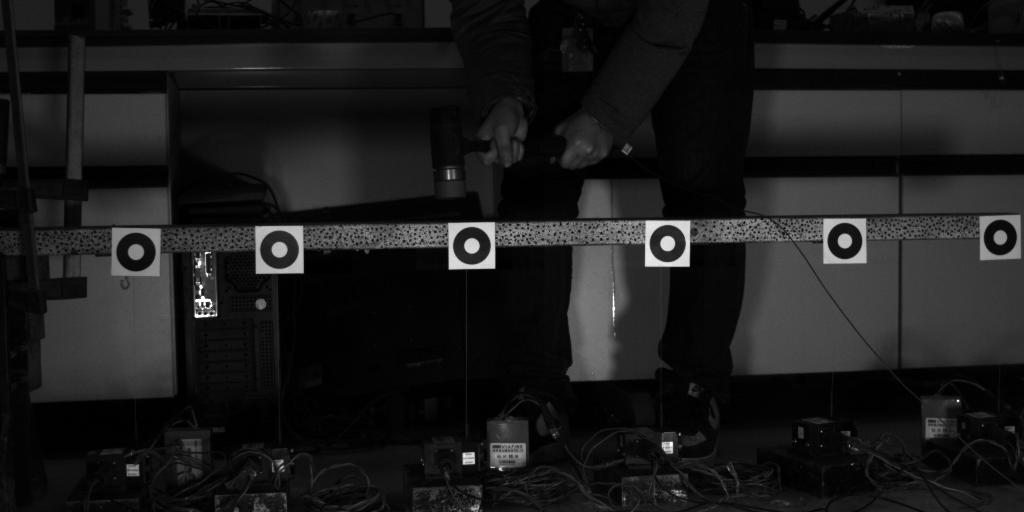

In [3]:
from PIL import Image
from IPython.display import display

# 读取BMP图片
image = Image.open(files_data[0])

# 直接在Jupyter Notebook中显示图片
display(image)


data\original\frame_0000.bmp


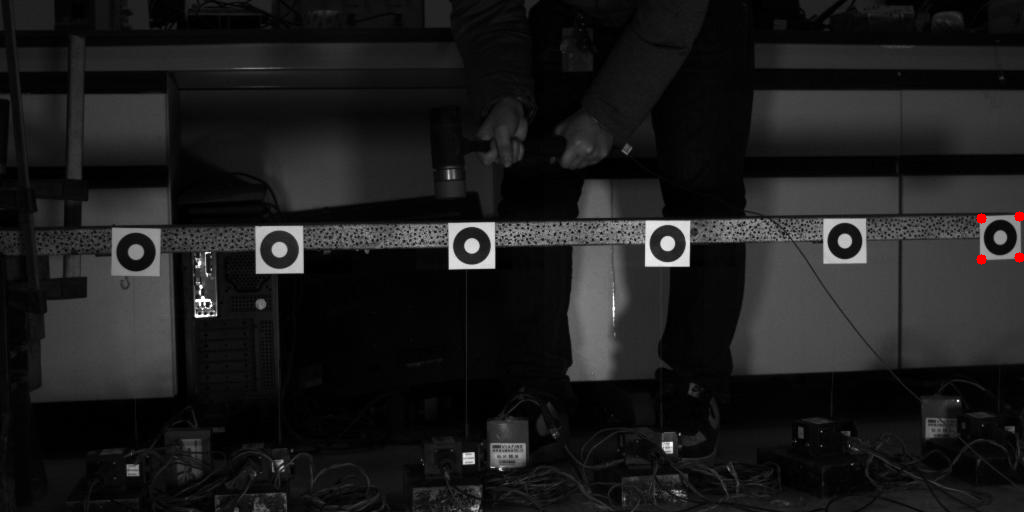

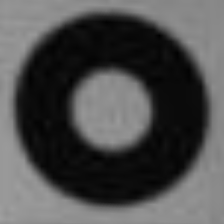

In [30]:
from PIL import Image
import cv2
import numpy as np
from IPython.display import display

print(files_data[0])  # 打印路径，检查是否正确
img = cv2.imread(files_data[0])

width,height=224,224

#pts1 = np.float32([[113,229],[160,229],[113,274],[159,275]])
#pts1 = np.float32([[257,228],[302,227],[257,272],[302,272]])
#pts1 = np.float32([[449,223],[494,223],[449,268],[494,268]])
#pts1 = np.float32([[647,222],[689,222],[647,265],[688,265]])
#pts1 = np.float32([[825,220],[865,220],[825,262],[865,262]])
pts1 = np.float32([[981,218],[1019,216],[981,259],[1019,257]])

pts2 = np.float32([[0,0],[width,0],[0,height],[width,height]])
 
matrix = cv2.getPerspectiveTransform(pts1,pts2)
imgOutput = cv2.warpPerspective(img,matrix,(width,height))
 
for x in range(0, 4):
    cv2.circle(img, (int(pts1[x][0]), int(pts1[x][1])), 5, (0, 0, 255), cv2.FILLED)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # 将BGR转换为RGB
display(Image.fromarray(img))

imgOutput = cv2.cvtColor(imgOutput, cv2.COLOR_BGR2RGB)  # 将BGR转换为RGB
display(Image.fromarray(imgOutput))


In [31]:
from tqdm import tqdm

# 遍历文件列表并显示进度条
for index, file in tqdm(enumerate(files_data), desc="Processing Images", total=len(files_data)):
    # 打开图像
    img = cv2.imread(file)
    
    # 裁剪图像
    cropped_image = cv2.warpPerspective(img,matrix,(width,height))
    
    # 创建保存目录（假设dir_temp是已经定义的保存目录）
    dir = os.path.join(dir_temp, "cropped")
    os.makedirs(dir, exist_ok=True)
    
    # 保存裁剪后的图像到指定目录
    cv2.imwrite(os.path.join(dir, 'frame_{:04d}.bmp'.format(index)), cropped_image)
    
dir_cropped_data = [os.path.join(dir_temp, 'cropped\\frame_{:04d}.bmp'.format(index)) for index in range(len(files_data))]

Processing Images: 100%|███████████████████████████████████████████████████████████| 1801/1801 [00:26<00:00, 67.00it/s]


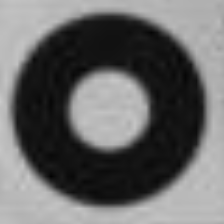

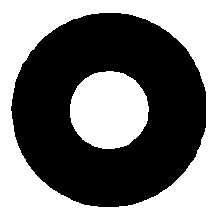

In [26]:
from PIL import Image, ImageEnhance
import cv2
import numpy as np

def process_image(image_path):
    # 这一行创建了一个增强器对象，用于调整图像的对比度。
    enhancer = ImageEnhance.Contrast(image)
    enhanced_image = enhancer.enhance(3.0)  # 以调整这个系数来增加或减少对比度。

    #display(enhanced_image)

    # 这一行将增强后的图像转换为灰度图像（'L'模式），即每个像素的强度用一个值表示（从黑到白）。
    gray_image = enhanced_image.convert('L')

    #display(gray_image)

    gray_array = np.array(gray_image)

    # 此行应用阈值处理将灰度图像转换为黑白图像。阈值为 128，低于此值的像素变为黑色（0），高于此值的像素变为白色（255）。cv2.THRESH_OTSU "是一种根据图像直方图自动确定阈值的方法。
    _, bw_image = cv2.threshold(gray_array, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # 这一行将黑白 NumPy 数组转换回 PIL 图像，以便显示或进一步处理。
    final_image = Image.fromarray(bw_image)
    
    return final_image

image = Image.open(dir_cropped_data[0])
display(image)

final_image = process_image(image)

display(final_image)

In [27]:
from tqdm import tqdm

# 遍历文件列表并显示进度条
for index, file in tqdm(enumerate(dir_cropped_data), desc="Processing Images", total=len(dir_cropped_data)):
    # 打开图像
    image = Image.open(file)
    
    final_image = process_image(image)
    
    # 创建保存目录（假设dir_temp是已经定义的保存目录）
    dir = os.path.join(dir_temp, "processed")
    os.makedirs(dir, exist_ok=True)
    
    # 保存裁剪后的图像到指定目录
    final_image.save(os.path.join(dir, 'frame_{:04d}.bmp'.format(index)))
    
dir_processed_data = [os.path.join(dir_temp, 'processed\\frame_{:04d}.bmp'.format(index)) for index in range(len(dir_cropped_data))]

Processing Images: 100%|███████████████████████████████████████████████████████████| 1801/1801 [00:52<00:00, 34.21it/s]


至此原始图像处理完毕
# 数据集生成

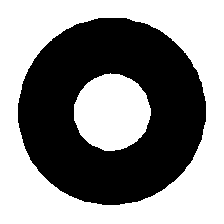

图像张量的形状： torch.Size([1, 224, 224])
图像张量的数据类型： torch.float32
像素(42, 42)的灰度值为：1.0
值为1的像素个数： 27215
值为0的像素个数： 22961


In [17]:
from PIL import Image
from IPython.display import display
import torch
from torchvision.transforms import ToTensor

# 假设您已经导入了Image和display模块，并定义了file变量和image对象
file = dir_processed_data[0]
image = Image.open(file)
display(image)

# 将图像转换为张量
to_tensor = ToTensor()
image_tensor = to_tensor(image)

# 显示张量的形状和数据类型
print("图像张量的形状：", image_tensor.shape)
print("图像张量的数据类型：", image_tensor.dtype)

# 获取图像张量的形状
channels, height, width = image_tensor.shape

# 假设要获取像素位置为(row, col)的像素值
row, col = (int)(128/3), (int)(128/3)  # 举例位置，您可以根据实际需求修改


gray_value = image_tensor[0, row, col].item()
print(f"像素({row}, {col})的灰度值为：{gray_value}")

# 统计值为1的像素个数
num_pixels_equal_to_1 = torch.sum(image_tensor == 1).item()

print("值为1的像素个数：", num_pixels_equal_to_1)

# 统计值为0的像素个数
num_pixels_equal_to_0 = torch.sum(image_tensor == 0).item()

print("值为0的像素个数：", num_pixels_equal_to_0)


In [15]:
from PIL import Image, ImageDraw
import numpy as np
import random

def add_irregular_smudge(image, draw, width=128, height=128):
    center = (random.uniform(0, width), random.uniform(0, height))  # 污迹的中心位置
    max_radius = 10  # 污迹最大半径
    steps = 60  # 污迹形成的步骤数
    x_center, y_center = center
    width, height = image.size

    theta = random.uniform(0, 2 * np.pi)
    
    for _ in range(steps):
        angle = random.gauss(theta, np.pi/4)
        radius = random.uniform(0, max_radius)
        x = int(x_center + radius * np.cos(angle))
        y = int(y_center + radius * np.sin(angle))

        # 在选定的点周围画小圆以模拟污迹的不规则形状
        for dy in range(-3, 4):  # 这里的数字可以根据需要调整以改变污迹的密集度
            for dx in range(-3, 4):
                nx, ny = x + dx, y + dy
                if 0 <= nx < width and 0 <= ny < height:
                    draw.point((nx, ny), fill=0)  # 使用0表示黑色


def create_image(width, height, background_color):
    image = Image.new("L", (width, height), background_color)
    draw = ImageDraw.Draw(image)
    return image, draw

def draw_circular_ring(draw, width, height, inner_radius, outer_radius):
    focus1, focus2 = get_foci(width, height)
    for y in range(height):
        for x in range(width):
            distance_to_center = np.sqrt((x - focus1[0]) ** 2 + (y - focus1[1]) ** 2) + \
                                 np.sqrt((x - focus2[0]) ** 2 + (y - focus2[1]) ** 2)
            if 2 * inner_radius <= distance_to_center <= 2 * outer_radius:
                draw.point((x, y), fill=0)  # Black
    return focus1, focus2

def add_smudges(draw, width, height, inner_radius, outer_radius, gross_point_width, gross_point_width2, focus1, focus2):
    direction = [(0, 0), (0, 1), (1, 0), (-1, 0), (0, -1), (1, 1), (-1, -1), (1, -1), (-1, 1)]
    for y in range(height):
        for x in range(width):
            distance_to_center = np.sqrt((x - focus1[0]) ** 2 + (y - focus1[1]) ** 2) + \
                                 np.sqrt((x - focus2[0]) ** 2 + (y - focus2[1]) ** 2)
            # 在圆环边缘添加一定程度的污迹
            if 2*inner_radius - gross_point_width <= distance_to_center <= 2*inner_radius + gross_point_width or \
                 2*outer_radius - gross_point_width <= distance_to_center <= 2*outer_radius + gross_point_width:
                if random.random() < 0.05:  # 控制污迹生成的概率
                    for dx,dy in direction:
                        draw.point((x+dx, y+dy), fill=0)  # 使用0表示黑色
                if random.random() < 0.05:  # 控制污迹生成的概率
                    for dx,dy in direction:
                        draw.point((x+dx, y+dy), fill=255)  
            if 2*inner_radius - gross_point_width2 <= distance_to_center <= 2*inner_radius + gross_point_width2 or \
                 2*outer_radius - gross_point_width2 <= distance_to_center <= 2*outer_radius + gross_point_width2:
                if random.random() < 0.1:  
                    draw.point((x, y), fill=0)  
                if random.random() < 0.1:  
                    draw.point((x, y), fill=255)  

def add_noise(draw, width, height, radio):
   # 随机选取点并随机翻转颜色
    num_points = int(width * height * radio)  # 随机选取的点的数量，可根据需要调整
    points = [(random.randint(0, width - 1), random.randint(0, height - 1)) for _ in range(num_points)]

    for point in points:
        x, y = point
        current_color = image.getpixel((x, y))
        new_color = 255 - current_color  # 黑色变为白色，白色变为黑色
        draw.point((x, y), fill=new_color)

def get_foci(width, height):
    random_displacement_range = width / 10
    mu, sigma = 0, 5  # Mean and standard deviation for Gaussian distribution
    focus1 = (width / 2 + random.uniform(-random_displacement_range, random_displacement_range), 
              height / 2 + random.uniform(-random_displacement_range, random_displacement_range))
    focus2 = (focus1[0] + random.gauss(mu, sigma), focus1[1] + random.gauss(mu, sigma))
    return focus1, focus2

def smooth_noise(image, draw, width, height, num_0_change_to_0):
    for y in range(height):
        for x in range(width):
            # Count the number of adjacent pixels that are black
            num_0 = sum(image.getpixel((nx, ny)) == 0
                        for nx, ny in [(x - 1, y), (x + 1, y), (x, y - 1), (x, y + 1)]
                        if 0 <= nx < width and 0 <= ny < height)

            # Update the pixel color based on the number of adjacent black pixels and the specified probabilities
            fill_color = 0 if random.random() < num_0_change_to_0[num_0] else 255
            draw.point((x, y), fill=fill_color)
            

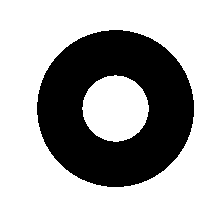

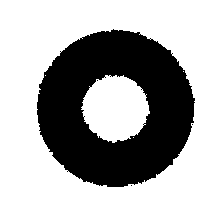

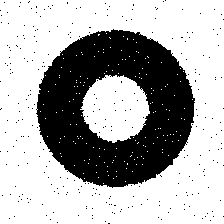

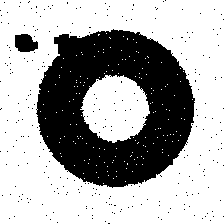

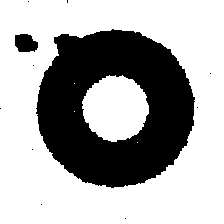

(115.06944862722666, 108.05676847175047)


In [25]:
# Parameters
width, height = 224, 224
background_color = "white"
random_number_near_one = random.uniform(0.8, 1.2)
inner_radius = 18*2 * random_number_near_one
outer_radius = 40*2 * random_number_near_one * random.uniform(0.9, 1.1)
gross_point_width = 0.5
gross_point_width2 = 2
num_0_change_to_0 = [0.0001, 0.00045, 0.7, 0.9998, 0.9999]

image, draw = create_image(width, height, background_color)
focus1, focus2 = draw_circular_ring(draw, width, height, inner_radius, outer_radius)
display(image)
add_smudges(draw, width, height, inner_radius, outer_radius, gross_point_width, gross_point_width2,  focus1, focus2)
display(image)
add_noise(draw, width, height, 0.01)
display(image)
add_irregular_smudge(image, draw)
add_irregular_smudge(image, draw)
add_irregular_smudge(image, draw)
display(image)
smooth_noise(image, draw, width, height, num_0_change_to_0)
display(image)

center = ((focus1[0] + focus2[0])/2 ,(focus1[1] + focus2[1])/2)
print(center)

In [30]:
import random
from PIL import Image, ImageDraw, ImageFont, ImageOps
import numpy as np
import os

def save_dataset( i, image, center, base_dir, set_name):
    set_dir = os.path.join(base_dir, set_name)
    if not os.path.exists(set_dir):
        os.makedirs(set_dir)
        
    image_path = os.path.join(set_dir, f'image_{i:05}.png')
    center_path = os.path.join(set_dir, f'center_{i:05}.txt')

    # 保存图像
    image.save(image_path)

    # 保存中心坐标到文本文件
    with open(center_path, 'w') as f:
        f.write(f'{center[0]},{center[1]}')

def generate_image_and_center(i, set_name):
    # Parameters for the image
    random_number_near_one = random.uniform(0.8, 1.2)
    inner_radius = 18*2 * random_number_near_one
    outer_radius = 40*2 * random_number_near_one * random.uniform(0.9, 1.1)

    # Create image
    image, draw = create_image(width, height, background_color)
    
    # Add shapes and effects
    focus1, focus2 = draw_circular_ring(draw, width, height, inner_radius, outer_radius)
    center = ((focus1[0] + focus2[0])/2, (focus1[1] + focus2[1])/2)
    save_dataset(i, image, center, dir_temp, set_name)
    add_smudges(draw, width, height, inner_radius, outer_radius, gross_point_width, gross_point_width2, focus1, focus2)
    save_dataset(i+1, image, center, dir_temp, set_name)
    add_noise(draw, width, height, 0.01)
    save_dataset(i+2, image, center, dir_temp, set_name)
    for _ in range(random.randint(1, 4)):
        add_irregular_smudge(image, draw)
    save_dataset(i+3, image, center, dir_temp, set_name)
    smooth_noise(image, draw, width, height, num_0_change_to_0)
    save_dataset(i+4, image, center, dir_temp, set_name)


In [29]:
from tqdm import tqdm

# 生成训练集
for i in tqdm(range(0, 6000, 5), desc="Generating train dataset"):
    generate_image_and_center(i, "train")

# 生成测试集
for i in tqdm(range(0, 2000, 5), desc="Generating test dataset"):
    generate_image_and_center(i, "test")

# 生成验证集
for i in tqdm(range(0, 2000, 5), desc="Generating validation dataset"):
    generate_image_and_center(i, "validation")


Generating train dataset:  60%|███████████████████████████████▉                     | 722/1200 [06:26<04:15,  1.87it/s]


KeyboardInterrupt: 

In [ ]:
from tqdm import tqdm

# 生成训练集
for i in tqdm(range(6000, 12000, 5), desc="Generating train dataset"):
    generate_image_and_center(i, "train")

# 生成测试集
for i in tqdm(range(2000, 4000, 5), desc="Generating test dataset"):
    generate_image_and_center(i, "test")

# 生成验证集
for i in tqdm(range(2000, 4000, 5), desc="Generating validation dataset"):
    generate_image_and_center(i, "validation")

Generating validation dataset:  82%|███████████████████████████████████████▉         | 326/400 [03:01<00:39,  1.88it/s]